**Задание:**

Повысить точность прогнозов, которые делает модель, с помощью более тщательной подготовки данных.

При подготовке датасета необходимо:
- Удаление строковых значений
- Очистка от пропущенных значений.
- Создание новых признаков.
- Преобразование признаков
- Отбор признаков

Моя задача — при помощи этих шагов и рекомендаций повысить качество предсказания. Чтобы понять, что качество улучшилось, ориентируйтесь на метрику MAPE: чем она меньше, тем лучше

**Критерии оценивания:**

- Качество кода (соблюдение стандартов оформления PEP-8, комментирование кода, README к проекту). Оформление проекта на GitHub, GitLab, Kaggle.
- Очистка данных.
- Исследование данных (качество визуализации, наличие идей, гипотез, комментариев).
- Генерация признаков.
- Отбор признаков.
- Преобразование признаков.
- Качество решения: результат метрики MAPE.

Импортируем бибилиотеки

In [566]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import Counter

In [567]:
data = pd.read_csv('data/hotels.csv')
data.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


In [568]:
#print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))

# Удаляем дубликаты:
#data = data.drop_duplicates()
#print('Размер таблицы после удаления дубликатов: {}'.format(data.shape))

Униикальных названий отелей представлено в наборе данных:

In [569]:
data['hotel_name'].describe()

count                                         386803
unique                                          1492
top       Britannia International Hotel Canary Wharf
freq                                            3587
Name: hotel_name, dtype: object

Проверка на года размещения отзывов:

In [570]:
data['review_date'] = pd.to_datetime(data['review_date'], format='%m/%d/%Y')
data['review_date'].describe()

count                           386803
mean     2016-08-13 14:41:18.712936704
min                2015-08-04 00:00:00
25%                2016-02-23 00:00:00
50%                2016-08-15 00:00:00
75%                2017-02-09 00:00:00
max                2017-08-03 00:00:00
Name: review_date, dtype: object

Проверим отзывы на уникальные и самые часто встречающиеся слова

In [571]:
# к нижнему регистру
data['negative_review'] = data['negative_review'].str.lower()
data['positive_review'] = data['positive_review'].str.lower()

Разделяем строки по пробелам и собираем уникальные слова из negative_review

In [572]:
from collections import Counter

# Разделяем строки по пробелам и собираем все слова из negative_review
all_negative_words = []
data['negative_review'].dropna().apply(lambda x: all_negative_words.extend(x.split()))

# Подсчитываем количество вхождений каждого слова
negative_word_counts = Counter(all_negative_words)

# Пример вывода самых частых слов
print(negative_word_counts.most_common())

[('the', 398224), ('was', 177329), ('a', 172606), ('to', 171723), ('and', 164247), ('no', 148337), ('room', 132025), ('in', 126328), ('negative', 97092), ('not', 94357), ('i', 91833), ('of', 90443), ('for', 88112), ('it', 80405), ('we', 74441), ('is', 61689), ('very', 60354), ('but', 56659), ('hotel', 55916), ('t', 54108), ('on', 51551), ('were', 46215), ('at', 45885), ('had', 45194), ('that', 44238), ('breakfast', 43528), ('have', 41060), ('with', 38968), ('small', 37372), ('there', 34728), ('be', 33943), ('as', 33012), ('they', 31853), ('you', 30426), ('from', 30080), ('this', 29790), ('staff', 29670), ('so', 29575), ('my', 29140), ('nothing', 29016), ('rooms', 26166), ('our', 25499), ('would', 24324), ('could', 24033), ('when', 23214), ('bed', 22291), ('are', 21973), ('all', 21765), ('too', 21585), ('one', 21052), ('only', 21034), ('bit', 20583), ('out', 20233), ('bathroom', 20004), ('didn', 19735), ('which', 19550), ('night', 18003), ('like', 16800), ('little', 16781), ('or', 16699

Разделяем строки по пробелам и собираем уникальные слова из positive_review

In [573]:
from collections import Counter

# Разделяем строки по пробелам и собираем все слова из positive_review
all_positive_words = []
data['positive_review'].dropna().apply(lambda x: all_positive_words.extend(x.split()))

# Подсчитываем количество вхождений каждого слова
positive_word_counts = Counter(all_positive_words)

# Пример вывода самых частых слов
print(positive_word_counts.most_common())

[('the', 385786), ('and', 315806), ('was', 177066), ('staff', 145874), ('location', 144568), ('very', 144568), ('to', 140847), ('a', 123588), ('room', 105728), ('hotel', 94000), ('in', 85671), ('good', 84480), ('of', 79844), ('great', 79160), ('is', 76765), ('for', 68506), ('were', 68308), ('friendly', 63870), ('breakfast', 63307), ('helpful', 57201), ('nice', 52027), ('we', 51818), ('clean', 50250), ('with', 49532), ('excellent', 46761), ('i', 45776), ('comfortable', 44843), ('it', 43258), ('bed', 37464), ('no', 33827), ('from', 32749), ('rooms', 30252), ('at', 27748), ('positive', 27288), ('on', 26737), ('lovely', 26269), ('all', 25973), ('you', 24401), ('are', 24260), ('stay', 24106), ('our', 23803), ('but', 23800), ('close', 23219), ('station', 21955), ('really', 21214), ('had', 20991), ('this', 20751), ('so', 20719), ('as', 20461), ('everything', 20345), ('perfect', 19399), ('service', 19393), ('well', 17877), ('not', 17434), ('my', 17247), ('quiet', 16445), ('amazing', 16166), ('

Создаём признак positive_words_rate — количество позитивных слов из positive_vocab в каждом positive_review

In [574]:
# Создаём признак positive_words_rate — количество позитивных слов из positive_vocab в каждом positive_review
positive_vocab = [
    'good', 'great', 'excellent', 'amazing', 'wonderful', 'perfect', 'nice', 'clean', 'comfortable', 'friendly',
    'helpful', 'spacious', 'quiet', 'enjoyed', 'enjoy', 'recommend', 'best', 'fantastic', 'love', 'loved',
    'pleasant', 'beautiful', 'modern', 'happy', 'satisfied', 'awesome', 'superb', 'outstanding', 'delicious',
    'convenient', 'affordable', 'fast', 'easy', 'welcoming', 'professional', 'attentive', 'impressed', 'cozy',
    'lovely', 'peaceful', 'relaxing', 'safe', 'bright', 'new', 'affordable', 'value', 'polite', 'efficient'
]

def count_positive_words(text):
    if pd.isna(text):
        return 0
    words = text.split()
    return sum(word in positive_vocab for word in words)

data['positive_words_rate'] = data['positive_review'].apply(count_positive_words)

Создаём признак negative_words_rate — количество негативных слов из negative_vocab в каждом negative_review

In [575]:
negative_vocab = [
    'bad', 'worse', 'worst', 'awful', 'terrible', 'horrible', 'poor', 'dirty', 'noisy', 'uncomfortable',
    'rude', 'disappointing', 'disappointed', 'problem', 'problems', 'issue', 'issues', 'broken', 'slow',
    'expensive', 'cold', 'smell', 'smelly', 'old', 'hard', 'difficult', 'unhappy', 'unpleasant', 'unhelpful',
    'unfriendly', 'small', 'tiny', 'crowded', 'unacceptable', 'unreliable', 'inconvenient', 'delay', 'delayed',
    'cancel', 'cancelled', 'unsafe', 'dangerous', 'hate', 'hated', 'complain', 'complaint', 'complaints', 'unacceptable',
    'unfair', 'unjust', 'unprofessional', 'untrustworthy', 'unresponsive', 'unavailable', 'unbearable', 'not good'
]

def count_negative_words(text):
    if pd.isna(text):
        return 0
    words = text.split()
    return (sum(word in negative_vocab for word in words)*(-1))

data['negative_words_rate'] = data['negative_review'].apply(count_negative_words)

In [576]:
data.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng,positive_words_rate,negative_words_rate
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,United Kingdom,leaving,3,1994,staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671,1,0
1,130 134 Southampton Row Camden London WC1B 5AF...,299,2017-01-12,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097,0,-1
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,2016-10-18,8.9,Legend Saint Germain by Elegancia,China,no kettle in room,6,406,no positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643,0,0
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,2015-09-22,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,no negative,0,607,friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540,5,0
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,2016-03-05,8.5,Golden Tulip Amsterdam West,Poland,torn sheets,4,7586,the staff was very friendly and helpful break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060,5,0


Проверяем признак **hotels['tags']** на количество уникальных признаков и анализируем его

In [577]:
unique_tags = set()
data['tags'].dropna().apply(
    lambda row: unique_tags.update([tag.strip(" []'\"") for tag in row.split(',')])
)
print(sorted(unique_tags))
print(f"Количество уникальных тегов: '{len(unique_tags)}' значений")

['1 King Bed Guest Room', '2 Adjacent Non Communicating Rooms', '2 Adjacent Rooms', '2 Connecting Deluxe Rooms with VIP Service for Kids', '2 Connecting Double Rooms', '2 Connecting Rooms', '2 Connecting Rooms 4 Adults', '2 Connecting Rooms 4 people', '2 Connecting Rooms 5 Adults', '2 Connecting Rooms 5 people', '2 Double Rooms next to each other', '2 Twin Beds Guest Room', '2 double Connecting Rooms', '2 rooms', '3 Connecting Rooms', '3 rooms', '4 Person Suite', '4 rooms', '5 rooms', 'Accessible Double Guest Room', 'Accessible King Room with Lounge Access', 'Accessible Queen Guest Room', 'Accessible Studio Suite', 'Accessible Twin Guest Room', 'Accessible Twin Room', 'Adjacent Double Rooms', 'Adjacent Rooms', 'Aldwych Double Twin Room', 'Ambassador Junior Suite', 'Ambassador Suite', 'Ambassadors Room', 'Amiral Single Room', 'Amsterdam Street Art Double Guest Room', 'Amsterdam Street Art Queen Guest Room', 'Andaz Double Room', 'Andaz King Twin Room', 'Andaz Large King Room', 'Andaz Lar

In [578]:
tag_counter = Counter()

for tags in data['tags'].dropna():
    tags_list = [tag.strip(" []'\"") for tag in tags.split(',')]
    tag_counter.update(set(tags_list))  # set, чтобы не считать повторения в одном отзыве

most_common_tag, count = tag_counter.most_common(1)[0]
print(f"Самый популярный тег: '{most_common_tag}', встречается в {count} отзывах.")

Самый популярный тег: 'Leisure trip', встречается в 313593 отзывах.


Проверим продолжительность размещения в отеле и извлечем из 'tags'

In [579]:
# Найти все теги, содержащие day, days, night, nights
filtered_tags = [tag for tag in unique_tags if any(word in tag for word in ['day', 'days', 'night', 'nights'])]
print(filtered_tags)

['Junior Suite Give me the night', 'Stayed 9 nights', 'Stayed 3 nights', 'Stayed 2 nights', 'Stayed 13 nights', 'Stayed 16 nights', 'Special Offer Double Room 3 nights minimum', 'Stayed 29 nights', 'King Room with Knightsbridge View', 'Suite with Knightsbridge View', 'Stayed 12 nights', 'Stayed 26 nights', 'Stayed 6 nights', 'Stayed 21 nights', 'Stayed 14 nights', 'Stayed 15 nights', 'Stayed 24 nights', 'Stayed 20 nights', 'Stayed 10 nights', 'Stayed 30 nights', 'Stayed 5 nights', 'Stayed 28 nights', 'Stayed 8 nights', 'Knightsbridge Suite', 'Stayed 22 nights', 'Stayed 25 nights', 'Stayed 11 nights', 'Stayed 19 nights', 'Stayed 23 nights', 'Stayed 4 nights', 'Stayed 27 nights', 'Stayed 7 nights', 'Stayed 1 night', 'Stayed 17 nights', 'Stayed 18 nights']


Text(0.5, 1.0, 'Гистограмма длительности пребывания')

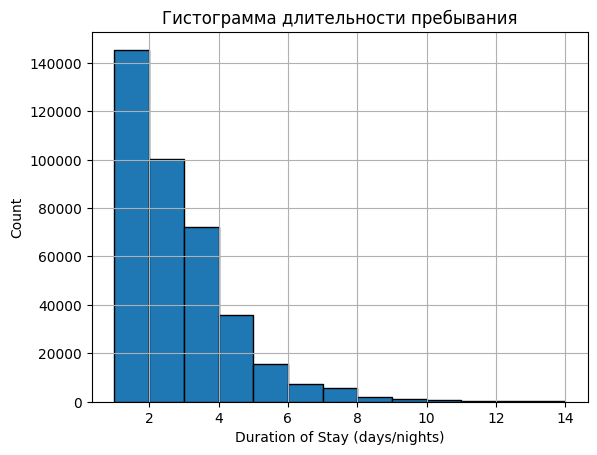

In [580]:
def extract_stay_duration(tags):
    pattern = r'(\d+)\s*(day|days|night|nights)'
    for tag in str(tags).split(','):
        match = re.search(pattern, tag)
        if match:
            return int(match.group(1))
    return None

data['duration_of_stay'] = data['tags'].apply(extract_stay_duration)
data['duration_of_stay'].hist(bins=range(1, 15), edgecolor='black')
plt.xlabel('Duration of Stay (days/nights)')
plt.ylabel('Count')
plt.title('Гистограмма длительности пребывания')

Создадим числовой признак 'days since review':

In [581]:
def days_since(row):
    row = row.split(' ')
    row_new = row[0]
    return row_new

data['days_since_review'] = data['days_since_review'].apply(days_since).astype('int64')

Создаем признак 'review_year':

In [582]:
# Создаем признак год:
data['review_year'] = data['review_date'].dt.year

Создаем признак 'country' & 'city'

In [583]:
def split(address):
    # Разделяем адрес на слова и берём последние 5 элементов (на случай длинных адресов)
    return address.split(' ')[-5:]

# Временный столбец с разбитым адресом
data['mask'] = data['hotel_address'].apply(split)

def country(mask):
    # Проверяем, что mask — это список нужной длины
    if len(mask) >= 2:
        # Для "United Kingdom", "United States" и т.п.
        if mask[-2] == 'United':
            return mask[-2] + ' ' + mask[-1]
        else:
            return mask[-1]
    return None  # если что-то пошло не так

#Создаем признак 'country'
data['country'] = data['mask'].apply(country)


def city(city):
    if city[-2] == 'United':
        return city[-5]
    else:
        return city[-2]

#Создаем признак 'city'.
data['city'] = data['mask'].apply(city)

# Удаляем временный столбец 
data = data.drop(['mask'], axis = 1)

data.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,tags,days_since_review,lat,lng,positive_words_rate,negative_words_rate,duration_of_stay,review_year,country,city
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,United Kingdom,leaving,3,1994,staff were amazing,...,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531,51.507894,-0.143671,1,0,2.0,2016,United Kingdom,London
1,130 134 Southampton Row Camden London WC1B 5AF...,299,2017-01-12,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,...,"[' Business trip ', ' Couple ', ' Standard Dou...",203,51.521009,-0.123097,0,-1,1.0,2017,United Kingdom,London
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,2016-10-18,8.9,Legend Saint Germain by Elegancia,China,no kettle in room,6,406,no positive,...,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289,48.845377,2.325643,0,0,3.0,2016,France,Paris
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,2015-09-22,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,no negative,0,607,friendly staff quiet comfortable room spotles...,...,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681,48.888697,2.394540,5,0,1.0,2015,France,Paris
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,2016-03-05,8.5,Golden Tulip Amsterdam West,Poland,torn sheets,4,7586,the staff was very friendly and helpful break...,...,"[' Business trip ', ' Couple ', ' Standard Dou...",516,52.385601,4.847060,5,0,6.0,2016,Netherlands,Amsterdam


# Проверим распределение городов и стран

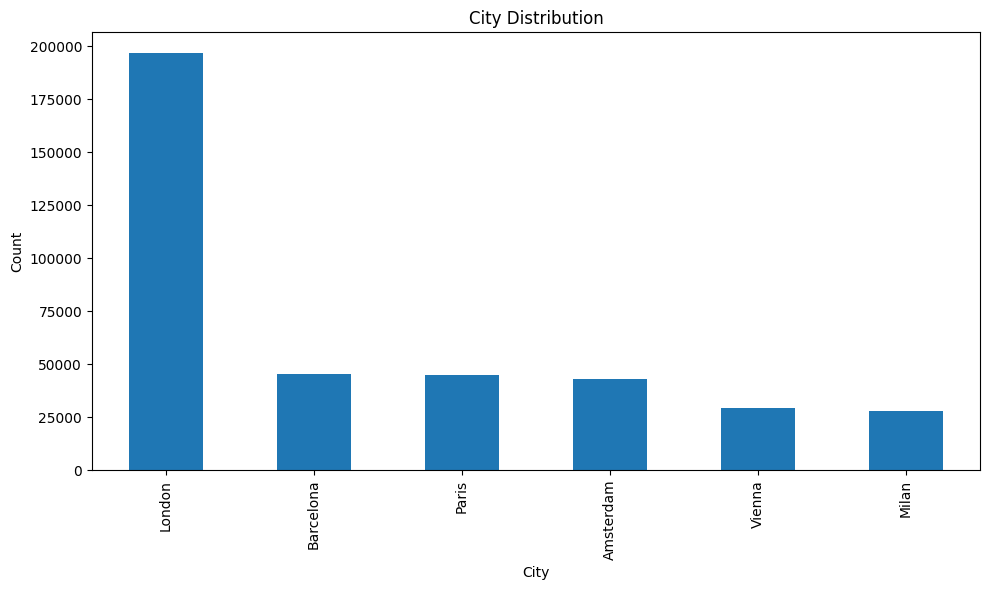

In [584]:
# График распределения для city
plt.figure(figsize=(10, 6))
data['city'].value_counts().plot(kind='bar')
plt.title('City Distribution')
plt.xlabel('City')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

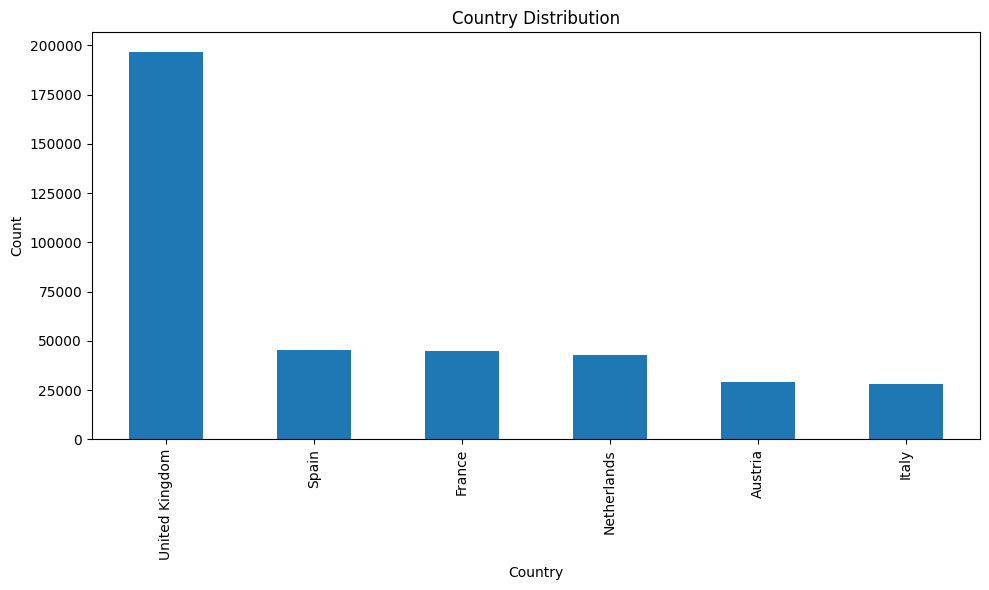

In [585]:
# График распределения для country
plt.figure(figsize=(10, 6))
data['country'].value_counts().plot(kind='bar')
plt.title('Country Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Все города находятся в Европе и всего их 6. На самом деле тут всего 6 стран и представлен только один город в каждой стране.
В таком случае можно отбросить названия городов и закодировать только страны:

In [586]:
data['is_united_kingdom'] = data['country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)
data['is_spain'] = data['country'].apply(lambda x: 1 if x == 'Spain' else 0)
data['is_france'] = data['country'].apply(lambda x: 1 if x == 'France' else 0)
data['is_netherlands'] = data['country'].apply(lambda x: 1 if x == 'Netherlands' else 0)
data['is_austria'] = data['country'].apply(lambda x: 1 if x == 'Austria' else 0)
data['is_italy'] = data['country'].apply(lambda x: 1 if x == 'Italy' else 0)


Взглянем на распеределние стран постояльцев отеля

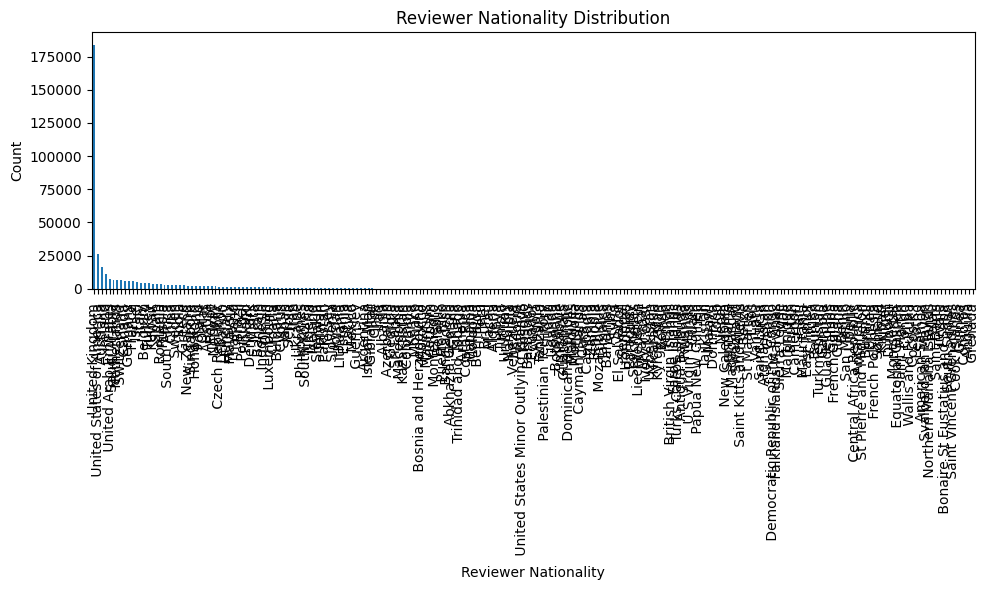

In [587]:
# График распределения для reviewer_nationality
plt.figure(figsize=(10, 6))
data['reviewer_nationality'].value_counts().plot(kind='bar')
plt.title('Reviewer Nationality Distribution')
plt.xlabel('Reviewer Nationality')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Как и предполагалось их очень много. Хочу создать признак на проверку "Резидент" или "Приезжий"

In [588]:
# Приводим к нижнему регистру и убираем пробелы по краям
data['reviewer_nationality'] = data['reviewer_nationality'].str.lower().str.strip()
data['country'] = data['country'].str.lower().str.strip()

# создаю признак 'is_resident', где 1 — резидент, 0 — приезжий
data['is_resident'] = (data['reviewer_nationality'] == data['country']).astype(int)
data['is_resident'].describe()

count    386803.000000
mean          0.346277
std           0.475783
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: is_resident, dtype: float64

Создадим признак на проверку Business trip, в принципе это будет достаточно чтобы отсеить бизнес поездки от поездок для отдыха:

In [589]:
data['is_business_trip'] = data['tags'].apply(lambda x: 1 if 'business' in x or 'Business' in x else 0)
data['is_business_trip'].describe()

count    386803.000000
mean          0.161964
std           0.368418
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: is_business_trip, dtype: float64

Так как постояльцы оставляют как положительные (что понравилось), так и отрицательные отзывы (что не понравилось), признаки **'review_total_positive_word_counts'** и **'review_total_negative_word_counts'** не представляют пользы по отдельности.

Предлагаю создать обобщённый признак **'review_word_score'** как разность между количеством положительных слов и отрицательных

Теория и смысл:
Если >0 то постоялец остался доволен и поставит рейтинг выше,
Если <0 то постоялец скорее все не доволен и поставит рейтинг ниже

Text(0.5, 1.0, 'Гистограмма review_word_score')

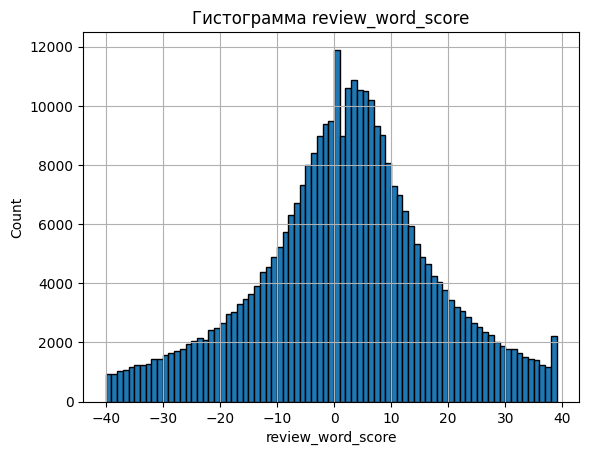

In [590]:
# Создаю признак  обобщяющий разницу между положительными словами и отрицательными
data['review_word_score'] = data['review_total_positive_word_counts'] - data['review_total_negative_word_counts']

data['review_word_score'].hist(bins=range(-40, 40), edgecolor='black')
plt.xlabel('review_word_score')
plt.ylabel('Count')
plt.title('Гистограмма review_word_score')


Сделаем нормализацию методом RobustScaler для data['review_word_score']:

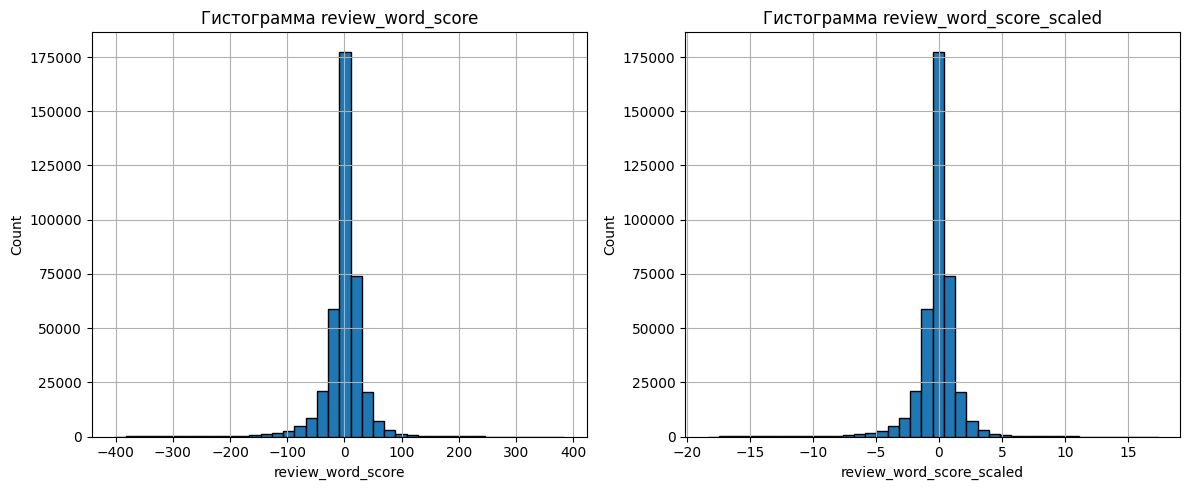

In [591]:
from sklearn import preprocessing

# Применяем RobustScaler к признаку 'review_word_score'
r_scaler = preprocessing.RobustScaler()
data['review_word_score_scaled'] = r_scaler.fit_transform(data[['review_word_score']])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
data['review_word_score'].hist(bins=40, edgecolor='black')
plt.title('Гистограмма review_word_score')
plt.xlabel('review_word_score')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
data['review_word_score_scaled'].hist(bins=40, edgecolor='black')
plt.title('Гистограмма review_word_score_scaled')
plt.xlabel('review_word_score_scaled')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Предлагаю создать обобщённый признак **'review_impact'** как разность между оценкой данной пользователем 'reviewer_score' от средней оценки отеля 'average_score'.

In [592]:
# Создаю признак  обобщяющий разницу между положительными словами и отрицательными
#data['review_impact'] = data['reviewer_score'] - data['average_score']

#data['review_impact'].hist(bins=range(-10, 10), edgecolor='black')
#plt.xlabel('review_impact')
#plt.ylabel('Count')
#plt.title('Гистограмма review_impact')

### Работа с пробелами

Так как мы уже выяснили что имеем дело с локациями в 6 странах, предлагаю использовать медианное значание для заполнения координат Latitude and Longitude.
Сделаем тоже самое и с количеством ночей в отеле, возьмем медиану по стране (городу)

In [593]:
# Заполняем пропуски в lat и lng медианой по каждому городу
for col in ['lat', 'lng']:
    data[col] = data.groupby('city')[col].transform(lambda x: x.fillna(x.median()))

In [594]:
# заполним пропуски в duration_of_stay медианой по каждому городу
data['duration_of_stay'] = data.groupby('city')['duration_of_stay'].transform(lambda x: x.fillna(x.median()))

# округлим до целых и приведем к Int64
data['duration_of_stay'] = data['duration_of_stay'].round().astype('Int64')

Проверим на пробелы в данных

In [595]:
data.info(28)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 33 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               386803 non-null  object        
 1   additional_number_of_scoring                386803 non-null  int64         
 2   review_date                                 386803 non-null  datetime64[ns]
 3   average_score                               386803 non-null  float64       
 4   hotel_name                                  386803 non-null  object        
 5   reviewer_nationality                        386803 non-null  object        
 6   negative_review                             386803 non-null  object        
 7   review_total_negative_word_counts           386803 non-null  int64         
 8   total_number_of_reviews                     386803 non-null  int64        

### Нужно убрать нечисловые признаки и отсеить ненужные числовые признаки:

**Убираем следующие не числовые признаки:**
['hotel_address', 'review_date', 'hotel_name', 'reviewer_nationality', 'negative_review', 'positive_review', 'tags', 'country', 'city']

**Убираем следующие числовые признаки:**
- 'review_year' - сильная корреляция с 'days_since_review', оставим только последнее
- 'additional_number_of_scoring' - не несет смысловой нагрузки (additional_number_of_scoring — есть также некоторые гости, которые просто поставили оценку сервису, но не оставили отзыв. Это число указывает, сколько там действительных оценок без проверки.)
- 'review_total_positive_word_counts' & 'review_total_negative_word_counts' - удялем, так как создали новый признак 'review_word_score'
- 'total_number_of_reviews', 'days_since_review' - не несут смысловой нагрузки и не должны влиять на рейтинг


In [596]:
data = data.drop(['hotel_address', 'review_date', 'hotel_name', 'reviewer_nationality', 'negative_review', 'positive_review', 'tags', 'country', 'city', 'review_year'], axis = 1)  
data = data.drop(['is_united_kingdom', 'is_spain', 'is_france', 'is_netherlands', 'is_austria', 'is_italy'], axis=1)
data = data.drop(['review_word_score', 'review_total_negative_word_counts', 'review_total_positive_word_counts'], axis=1)
#data = data.drop([], axis=1)
data.head(3)

,additional_number_of_scoring,average_score,total_number_of_reviews,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,lat,lng,positive_words_rate,negative_words_rate,duration_of_stay,is_resident,is_business_trip,review_word_score_scaled
0,581,8.4,1994,7,10.0,531,51.507894,-0.143671,1,0,2,1,0,-0.045455
1,299,8.3,1361,14,6.3,203,51.521009,-0.123097,0,-1,1,1,1,-0.136364
2,32,8.9,406,14,7.5,289,48.845377,2.325643,0,0,3,0,0,-0.363636


In [597]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 14 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   total_number_of_reviews                     386803 non-null  int64  
 3   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 4   reviewer_score                              386803 non-null  float64
 5   days_since_review                           386803 non-null  int64  
 6   lat                                         386803 non-null  float64
 7   lng                                         386803 non-null  float64
 8   positive_words_rate                         386803 non-null  int64  
 9   negative_words_rate                         386803 non-null  int64  
 

In [598]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = data.drop(['reviewer_score'], axis = 1)  
y = data['reviewer_score'] 

In [599]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [600]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [601]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  


In [602]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.1324028275655863


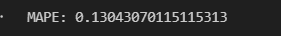
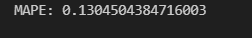

Небольшой бонус:


In [603]:
# # убираем признаки которые еще не успели обработать, 
# # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
# object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']
# hotels.drop(object_columns, axis = 1, inplace=True)

# # заполняем пропуски самым простым способом
# hotels = hotels.fillna(0)